# 

# 
Developed as part of European Union Horizon 2020 programme funded SCALE-UP project (grant agreement no. 955332).

## Import libraries, functions and constants

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from utils import (
    compare_test_with_predicition,
    fit_model,
    get_filtered_merged_data,
    get_pipeline,
    add_seasonability_columns,
    predict,
    draw_results,
    print_results,
    BASE,
    MINUS_10,
    MINUS_20,
    ZERO,
    PLUS_10,
    PLUS_20,
    DRY_WEATHER,
    SEASONABILITY_COLUMNS,
    RAIN,
    TEMPERATURE,
    YEAR,
)



## Load and prepare data

In [2]:
df, df_rain_train, df_temperature_train = get_filtered_merged_data("../data/parkings_small.csv")

Found 718955 parkings in zone


## Create pipelines and train models

#

mean squared error: 4891.57373046875
mean squared error: 4879.97998046875
mean squared error: 4297.68603515625


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['hour', 'month',
                                                   'dayofweek']),
                                                 ('Standard', StandardScaler(),
                                                  ['temperature', 'year'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, random_state=22, ...))])

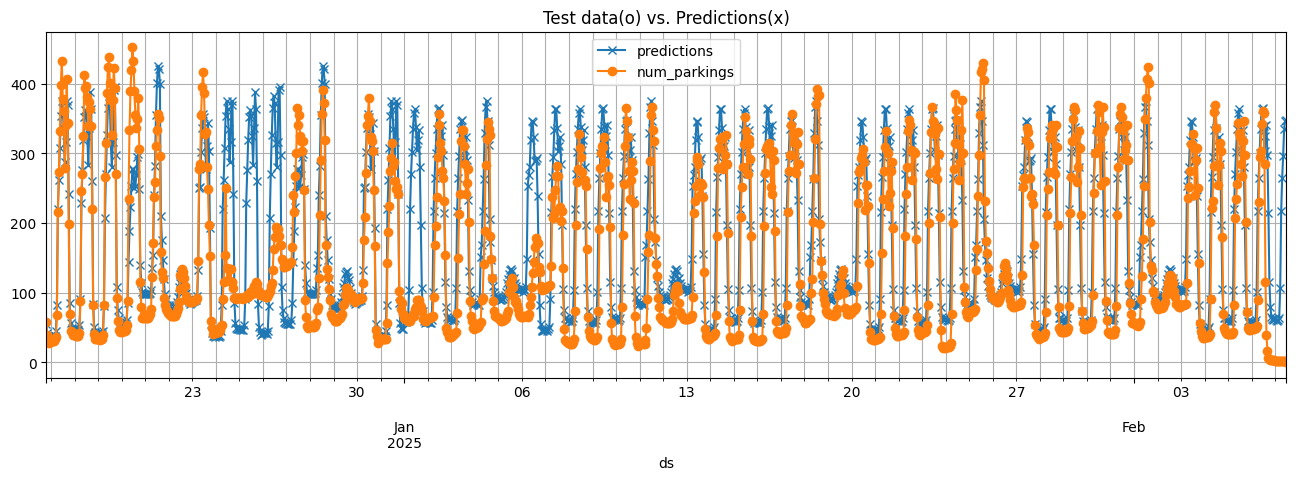

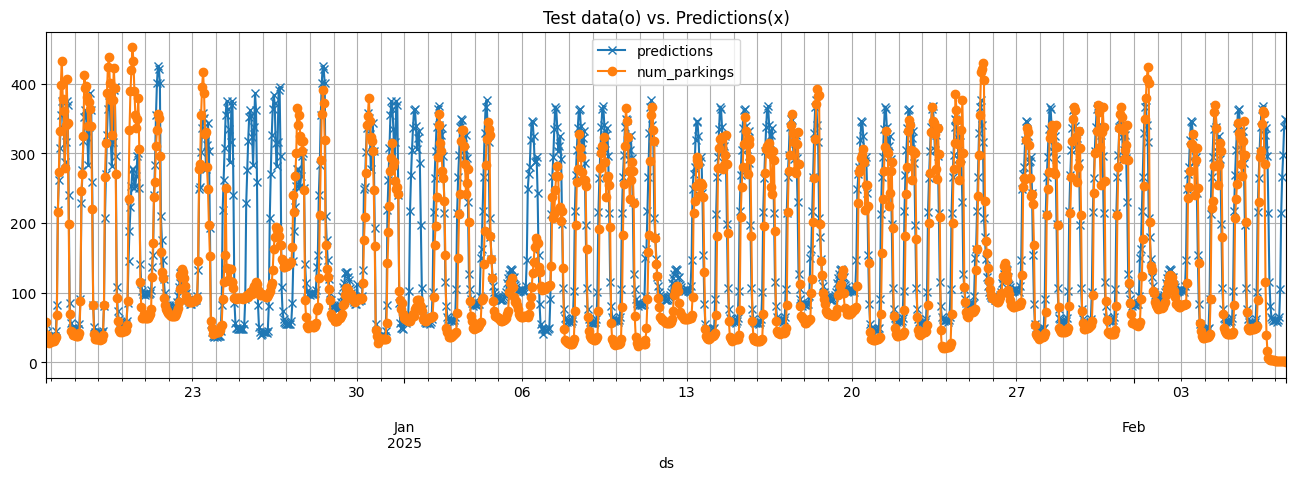

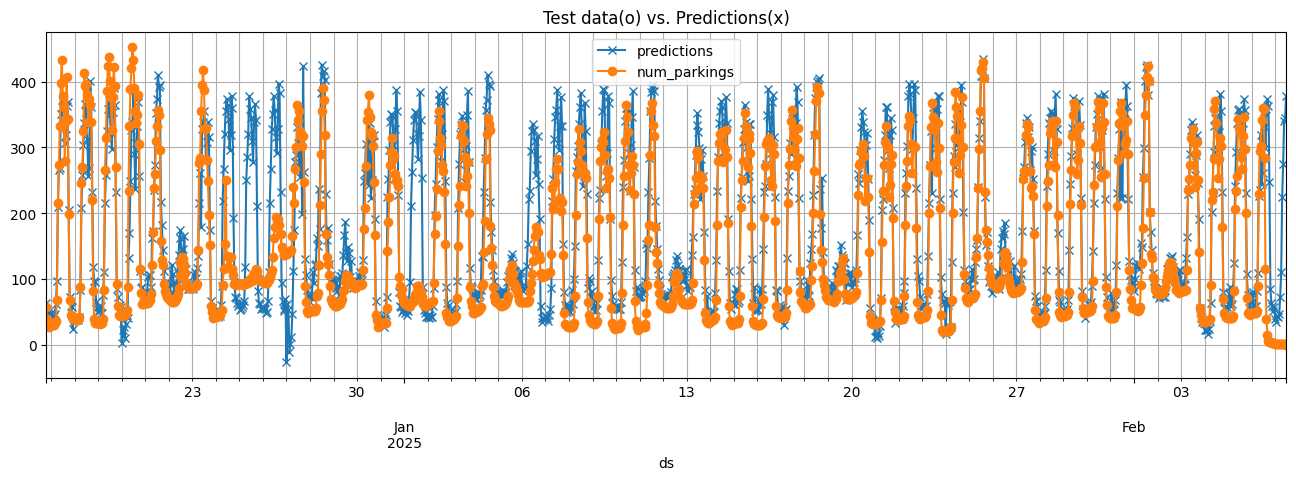

In [3]:
df_base = add_seasonability_columns(df)
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, learning_rate=0.1, max_depth=None, random_state=42)

pipeline = get_pipeline(xgb_model, standard_columns=[YEAR])
X_test, y_test = fit_model(pipeline, df_base, SEASONABILITY_COLUMNS)
compare_test_with_predicition(pipeline, X_test, y_test)
df_rain_train = add_seasonability_columns(df_rain_train)
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, learning_rate=0.1, max_depth=None, random_state=32)

pipeline_rain = get_pipeline(xgb_model, standard_columns=[YEAR, RAIN])
X_test, y_test = fit_model(pipeline_rain, df_rain_train, SEASONABILITY_COLUMNS+[RAIN])
compare_test_with_predicition(pipeline_rain, X_test, y_test)
df_temperature_train = add_seasonability_columns(df_temperature_train)
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, learning_rate=0.1, max_depth=None, random_state=22)

pipeline_temperature = get_pipeline(xgb_model, standard_columns=[TEMPERATURE, YEAR])
X_test, y_test = fit_model(pipeline_temperature, df_temperature_train, SEASONABILITY_COLUMNS+[TEMPERATURE])
compare_test_with_predicition(pipeline_temperature, X_test, y_test)

## Make predictions

Forecast period: 2025-02-07 11:00:00 - 2025-03-09 11:00:00
Base forecast for parkings: 124103.
Forecast for parkings in rain: 126323.  Diff to base 2220
Forecast for parkings in dry weather: 124242.  Diff to base 139
Forecast for parkings in -20 degrees temperature: 120354.  Diff to base -3749
Forecast for parkings in -10 degrees temperature: 120354.  Diff to base -3749
Forecast for parkings in 0 degrees temperature: 124369.  Diff to base 266
Forecast for parkings in 10 degrees temperature: 125204.  Diff to base 1101
Forecast for parkings in 20 degrees temperature: 131578.  Diff to base 7475


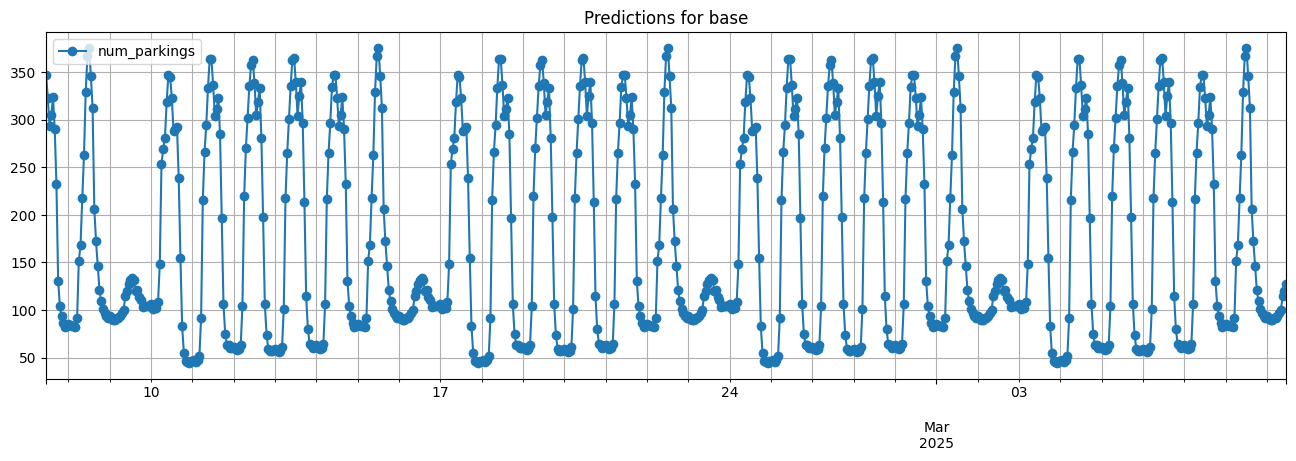

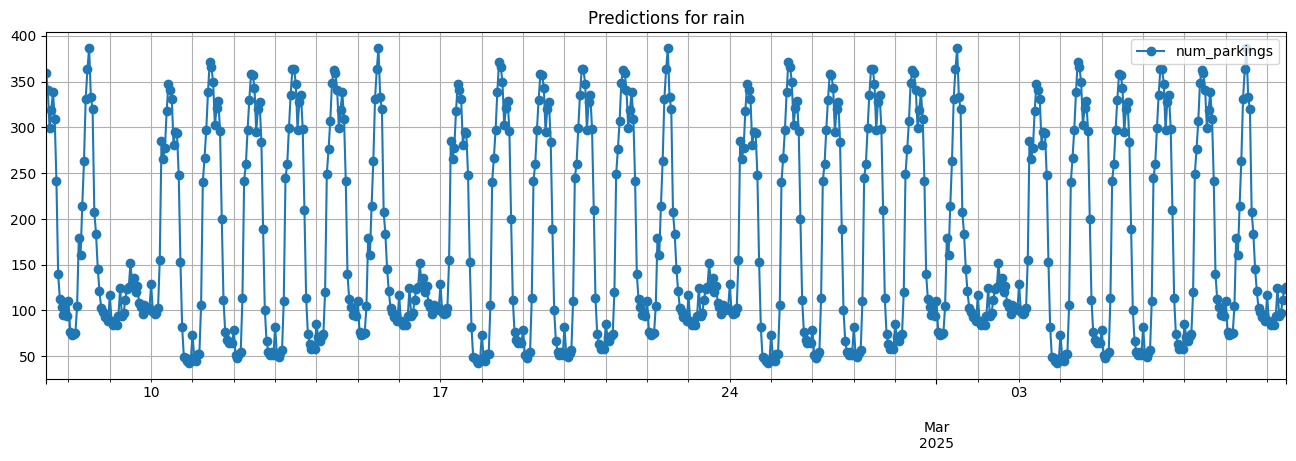

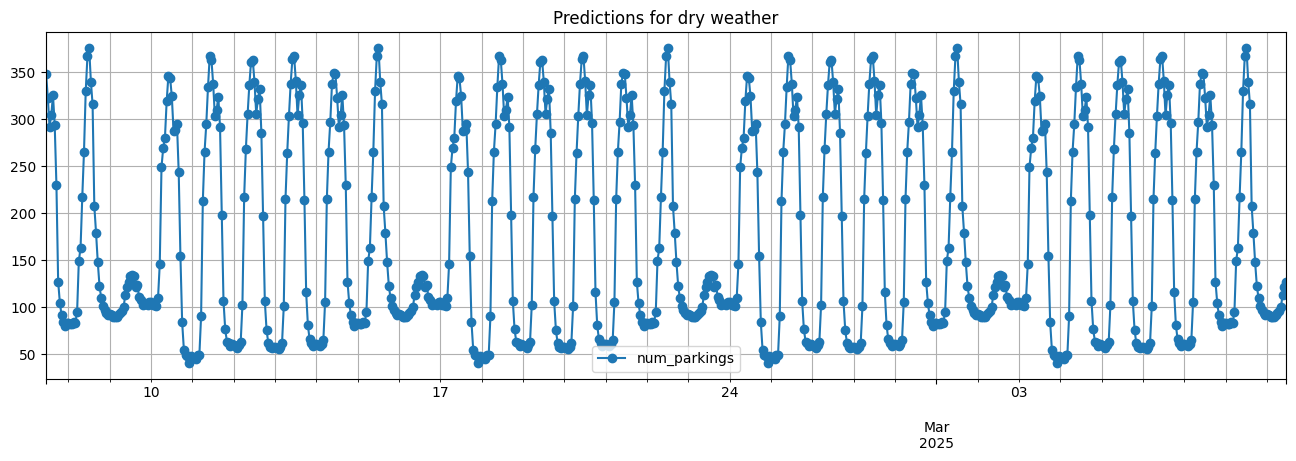

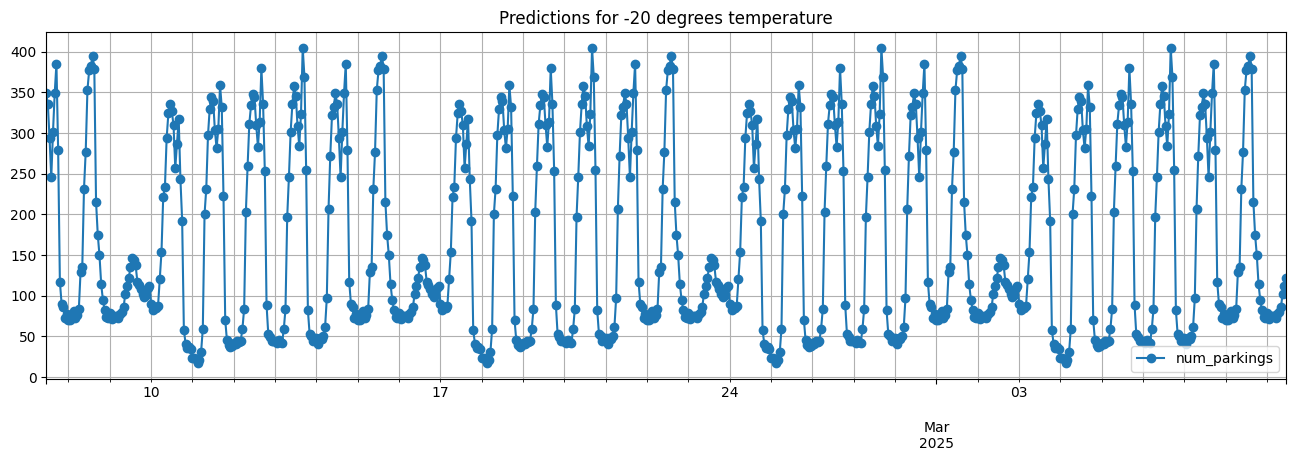

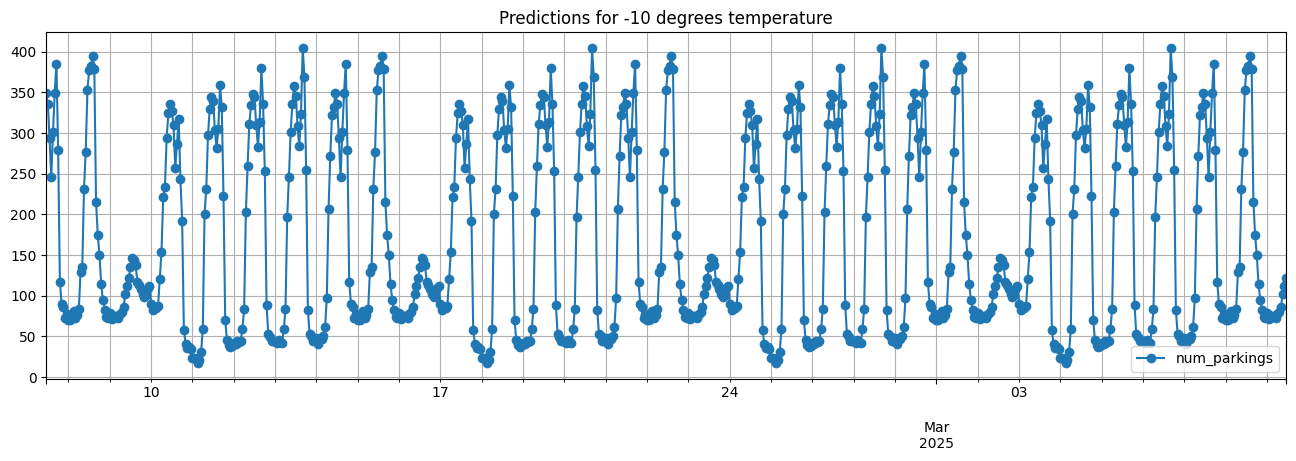

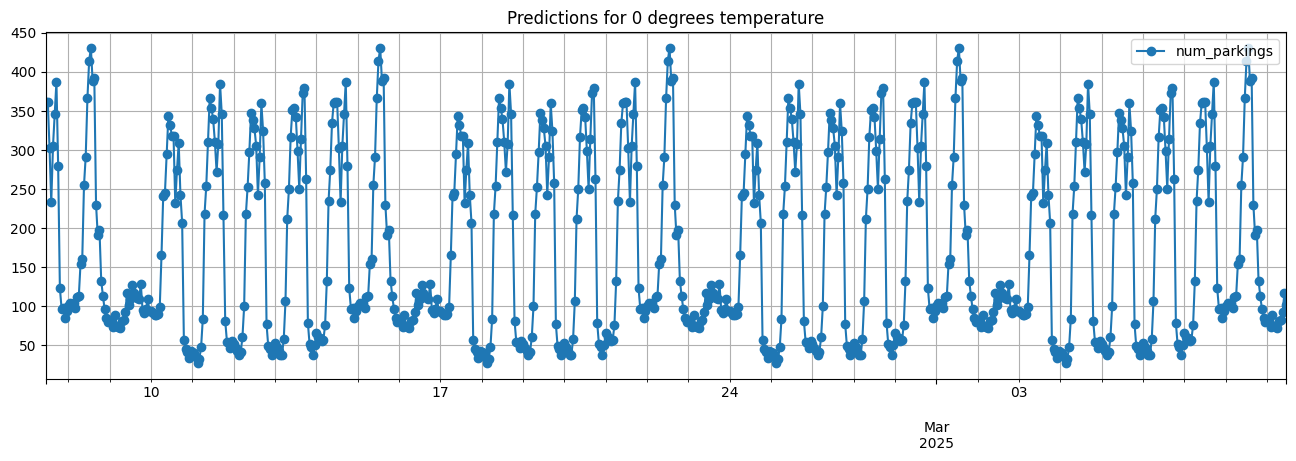

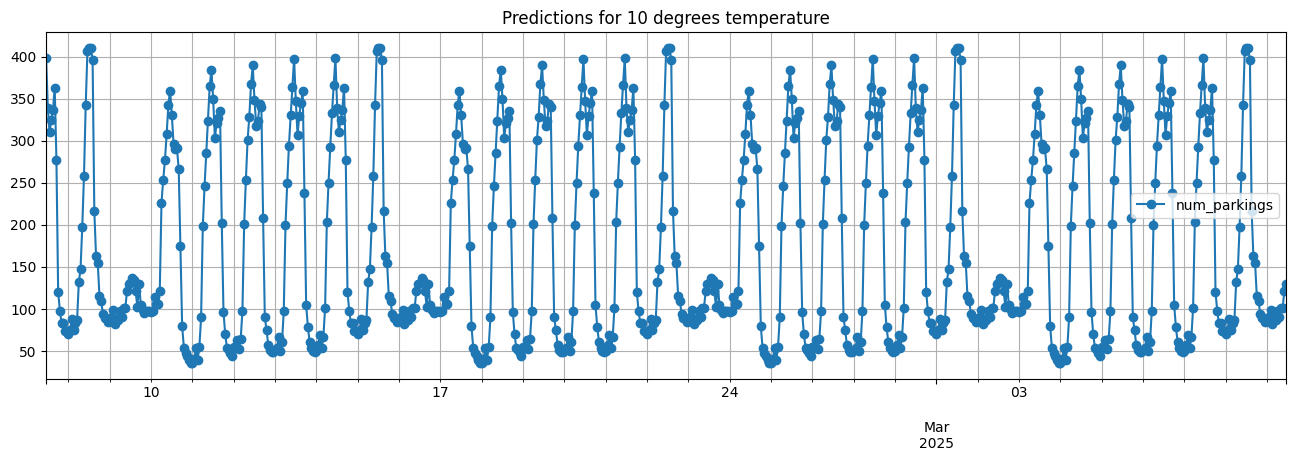

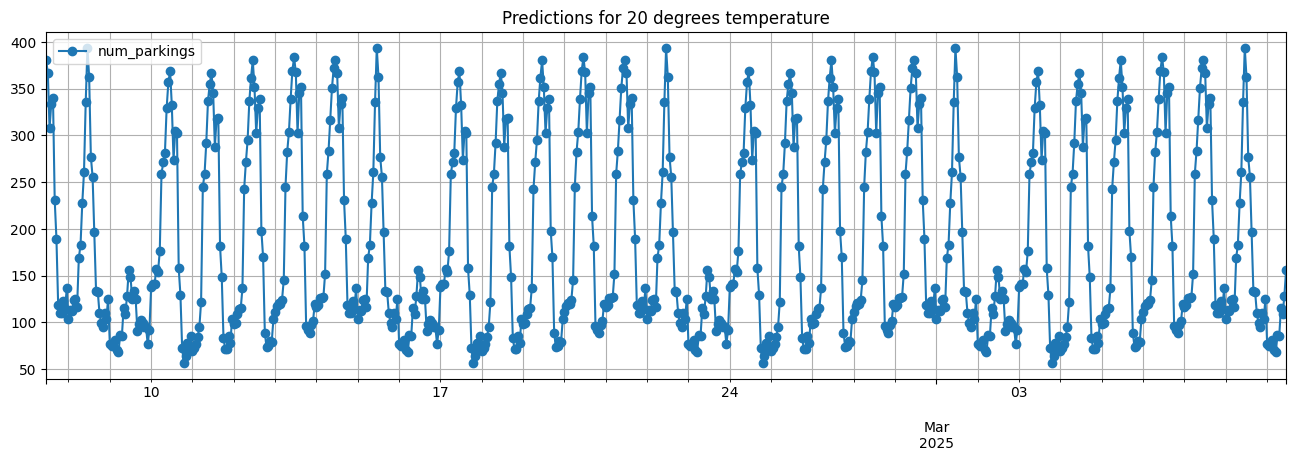

In [6]:
results = {}
date_range = pd.date_range(start="2025-02-07 11:00:00", end="2025-03-09 11:00:00", freq="h")
results[BASE] = predict(pipeline, date_range)
results[RAIN] = predict(pipeline_rain, date_range, rain=True)
results[DRY_WEATHER] = predict(pipeline_rain, date_range, rain=False)
results[MINUS_20] = predict(pipeline_temperature, date_range, temperature=-20)
results[MINUS_10] = predict(pipeline_temperature, date_range, temperature=-10)
results[ZERO] = predict(pipeline_temperature, date_range, temperature=0)
results[PLUS_10] = predict(pipeline_temperature, date_range, temperature=10)
results[PLUS_20] = predict(pipeline_temperature, date_range, temperature=20)
print_results(date_range, results)
draw_results(results)